# Благотворительный фонд АиФ Доброе сердце

- хочет лучше узнать своих благотворителей, чтобы максимально эффективно выстроить работу с ними. 
    
             По итогам проекта представители фонда хотели бы получить следующие результаты:
   
•	Сегменты пользователей: RFM-анализ, описание сегментов, таблицу с id благотворителя и его сегментом;

•	Когортный анализ: заказчик просит разбить когорты по месяцам;

•	Прочие метрики, которые можно получить из данных.



     Задачи:

– анализ эффективности каналов привлечения пользователей.

– проведение RFM-анализа, 

– проведение когортного анализа (retention, LTV, средний чек), 

– расчет основных маркетинговых и продуктовых метрик,


                                        Чтение данных

Импортируем библиотеки. Считаем данные из csv-файлов в датафреймы и сохраним в переменные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
import seaborn as sns
import numpy as np
import statistics 
plt.style.use("ggplot")

Создаем списки для файлов и датасетов

In [2]:
list_of_files = ['dobroaif_1.csv','dobroaif_2.csv','dobroaif_3.csv']

In [3]:
list_of_dfs = []

Делаем список с названием колонок 

In [4]:
new_cols = ['action_id', 'user_action', 'datetime', 'channel_id', 'channel_name', 'user_id']

Загружаем датасеты

In [5]:
for file in list_of_files:
    df = pd.read_csv(file,encoding= 'utf8', sep=';', usecols = [0, 2, 4, 6, 7, 17])
    old_cols = df.columns.tolist()
    cols_dict = {k: v for k, v in zip(old_cols, new_cols)}
    df = df.rename(columns = cols_dict)
    list_of_dfs.append(df)

Соединяем датасеты в один 

In [6]:
total = pd.concat(list_of_dfs)

                               Дата сет действий пользователей 

In [7]:
action = df
action

,action_id,user_action,datetime,channel_id,channel_name,user_id
0,175095827,Копия Копия Фандрайзинговая. Даша Семенова 2,2023-10-09 10:24:37,3,Email,2861
1,175102527,Копия Копия Фандрайзинговая. Даша Семенова 2 О...,2023-10-09 10:26:31,3,Email,2861
2,178613400,Счастливая история Марк Садартинов. Разовые От...,2023-10-16 15:00:19,3,Email,2861
3,178615150,Счастливая история Марк Садартинов. Разовые,2023-10-16 15:00:08,3,Email,2861
4,182949420,Копия Фандрайзинговая. Герман Семенов,2023-10-24 10:58:43,3,Email,2861
...,...,...,...,...,...,...
115603,191693755,DOI. Спасибо за разовое пожертвование Отправка,2023-11-07 10:02:23,3,Email,42438
115604,191690843,Клик — 1500р,2023-11-07 09:59:11,9,Сайт,42438
115605,191691072,Подтверждение подписки на новости Отправка,2023-11-07 10:02:12,3,Email,42438
115606,191691199,Просмотр продукта в операции 'Просмотр продукта',2023-11-07 10:00:12,9,Сайт,42438


                                                Платежи пользователей

In [8]:
df = pd.read_csv('paymentsaif.csv', sep=';', encoding= 'cp1251', usecols = [2, 3, 5, 17, 20, 21, 30])

In [9]:
df.columns = ['order_datetime', 'channel_id', 'channel_name', 'order_aim', 'order_sum', 'order_status', 'user_id']

In [10]:
pays = df[df.order_status == 'Paid']

In [11]:
display(pays.head(10), pays.tail(10))

,order_datetime,channel_id,channel_name,order_aim,order_sum,order_status,user_id
0,14.10.2021 15:50,1,Административный сайт Mindbox,На уставную деятельность,1,Paid,2734
1,18.03.2021 10:52,1,Административный сайт Mindbox,На уставную деятельность,50,Paid,2734
3,29.03.2023 15:15,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,2847
4,16.06.2021 23:10,1,Административный сайт Mindbox,На уставную деятельность,200,Paid,2847
5,20.09.2021 14:29,1,Административный сайт Mindbox,На уставную деятельность,25,Paid,2861
6,16.03.2021 12:24,1,Административный сайт Mindbox,На уставную деятельность,10,Paid,2861
7,11.02.2022 10:31,1,Административный сайт Mindbox,На уставную деятельность,10,Paid,2861
8,18.01.2022 15:01,1,Административный сайт Mindbox,На уставную деятельность,20,Paid,2861
9,26.07.2021 13:00,1,Административный сайт Mindbox,На уставную деятельность,15,Paid,2861
10,21.04.2022 11:16,9,Сайт,NaN,10,Paid,2861


,order_datetime,channel_id,channel_name,order_aim,order_sum,order_status,user_id
54419,09.11.2023 10:28,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,42454
54422,09.11.2023 10:37,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,500,Paid,42457
54424,09.11.2023 10:38,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,42458
54428,09.11.2023 10:48,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,42460
54429,09.11.2023 10:48,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,42461
54434,09.11.2023 10:52,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,50,Paid,42464
54435,09.11.2023 10:52,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,20,Paid,42465
54441,09.11.2023 11:50,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,500,Paid,42467
54443,09.11.2023 12:02,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,100,Paid,42468
54444,09.11.2023 12:38,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,100,Paid,42469


order_datetime    # Дата и Время первого действия

channel_id        # Идентификатор канала привлечения первого действия

channel_name      # Название канала привлечения первого действия

order_aim         # Поле название продукта

order_sum         # Поле цена линии

order_status      # Идентификатор статуса заказа (внешний)

user_id           # Идентификатор пользователя mindbox (для связи таблиц)


- Оставили только нужные для анализа столбцы
- Связанные столбцы:  'channel_id', # Идентификатор канала привлечения первого действия и 'channel_name', # Название канала привлечения первого действия
- Индекс строк уникальный 
- Идентификатор пользователя уникальный
- Строки упорядоченны по 'user_id'
- Мультииндексы не требуются 

In [12]:
pays.dtypes

order_datetime    object
channel_id         int64
channel_name      object
order_aim         object
order_sum          int64
order_status      object
user_id            int64
dtype: object

Приведем дату к нужному формату

In [13]:
pays['order_datetime'] = pd.to_datetime(pays['order_datetime'], format='%d.%m.%Y %H:%M')

C:\Users\Анна\AppData\Local\Temp\ipykernel_9472\786997436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays['order_datetime'] = pd.to_datetime(pays['order_datetime'], format='%d.%m.%Y %H:%M')


In [14]:
# paymentsaif.date = pd.to_datetime(paymentsaif.date, dayfirst=True).dt.date

In [15]:
pays['order_datetime'].agg(['min', 'max'])

min   2021-01-01 00:00:00
max   2023-11-09 13:03:00
Name: order_datetime, dtype: datetime64[ns]

Посчитаем период активности пользователей в днях

In [16]:
pays['period'] = (
    pays.groupby('user_id')['order_datetime']
    .transform(lambda cell: int((cell.max() - cell.min()) / pd.Timedelta('1d')) + 1)
)

C:\Users\Анна\AppData\Local\Temp\ipykernel_9472\3923651448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays['period'] = (


In [17]:
pays.duplicated().sum()

148

Дубликаты оставим 

Изучим пропущенные значения в столбцах

In [18]:
pays.isna().mean().sort_values(ascending=False)

order_aim         0.002994
order_datetime    0.000000
channel_id        0.000000
channel_name      0.000000
order_sum         0.000000
order_status      0.000000
user_id           0.000000
period            0.000000
dtype: float64

In [19]:
pd.DataFrame(pays.isna().mean().to_frame(name='Пропуски').query('Пропуски > 0')['Пропуски'])\
            .style.background_gradient('coolwarm')\
            .format({'Пропуски':'{:.0%}'})

,Пропуски
order_aim,0%


Пропуски в незначительном значении

                            Уникальные значения

In [20]:
# количество всех уникальных значений в столбце
pays['order_aim'].nunique()

132

In [21]:
# получить набор всех уникальных значений в столбце
pays['order_aim'].unique()

array(['На уставную деятельность',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Ратмир Шаповалов',
       nan,
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Эвелина Квасова',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Максим Широкин',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Дарья Макеева',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Иван Нагорный',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Кира Чубарова',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Руслан Сафронов',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Кристина Шабетник',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Никита Суриков',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Снежана О.',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Кристина Разживина',
       'Пожертвование Благотворитель

                                 Типы переменных

Количественная:
    
    order_datetime, channel_id, order_sum, period, user_id 

Категориальная:

    order_aim, channel_name, order_status 


In [22]:
pays.describe().round(1)

,channel_id,order_sum,user_id,period
count,41079.0,41079.0,41079.0,41079.0
mean,6.2,761.0,26328.9,365.4
std,3.8,2722.2,8369.0,343.2
min,1.0,0.0,2734.0,1.0
25%,1.0,150.0,19967.5,1.0
50%,9.0,300.0,25537.0,301.0
75%,9.0,500.0,33171.5,668.0
max,9.0,200000.0,42469.0,1037.0


Есть ли аномальные значения: отрицательный возраст, трудовой стаж больше 100 лет. 
Насколько сильно отличаются среднее и медиана?
Допустимы ли здесь нули и если да, то сколько? Есть ли пропуски?

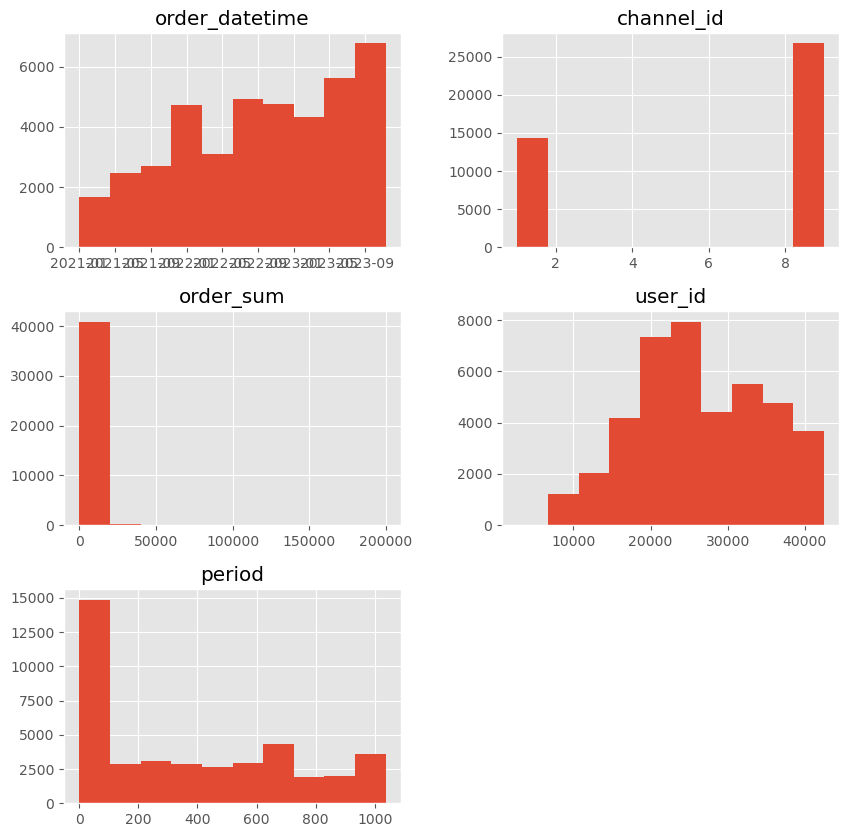

In [23]:
pays.hist(figsize=(10, 10))
plt.show()

<AxesSubplot:xlabel='user_id', ylabel='order_sum'>

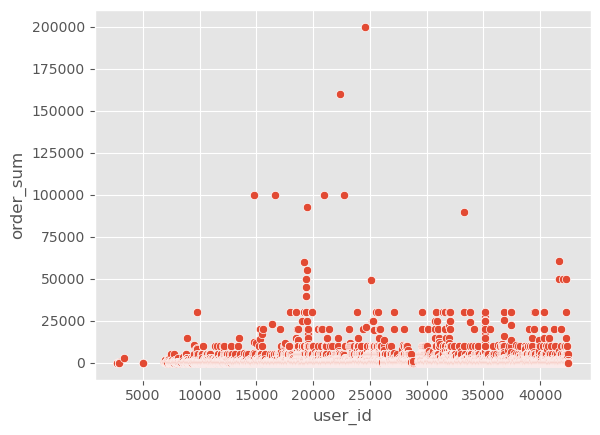

In [24]:
# Построить графики пересечений значений признаков (диаграммы рассеяния), например возраст и рост
seaborn.scatterplot(x='user_id', y='order_sum', data=pays)

In [25]:
pays

,order_datetime,channel_id,channel_name,order_aim,order_sum,order_status,user_id,period
0,2021-10-14 15:50:00,1,Административный сайт Mindbox,На уставную деятельность,1,Paid,2734,211
1,2021-03-18 10:52:00,1,Административный сайт Mindbox,На уставную деятельность,50,Paid,2734,211
3,2023-03-29 15:15:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,2847,651
4,2021-06-16 23:10:00,1,Административный сайт Mindbox,На уставную деятельность,200,Paid,2847,651
5,2021-09-20 14:29:00,1,Административный сайт Mindbox,На уставную деятельность,25,Paid,2861,632
...,...,...,...,...,...,...,...,...
54434,2023-11-09 10:52:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,50,Paid,42464,1
54435,2023-11-09 10:52:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,20,Paid,42465,1
54441,2023-11-09 11:50:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,500,Paid,42467,1
54443,2023-11-09 12:02:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,100,Paid,42468,1


In [26]:
pays['channel_id'].value_counts(dropna=False)

9    26749
1    14330
Name: channel_id, dtype: int64

Выбросы в столбце 

<AxesSubplot:>

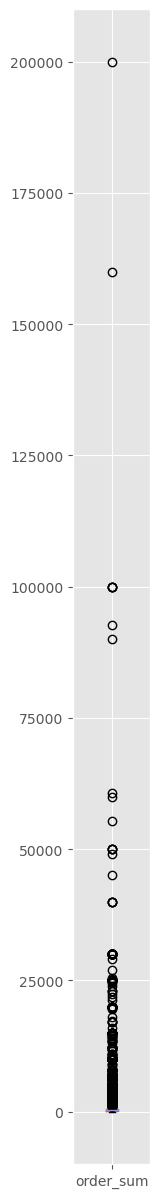

In [27]:
pays.boxplot(column='order_sum', grid=True, figsize=(1, 15))

In [28]:
pays['channel_name'].value_counts(dropna=False)

Сайт                             26749
Административный сайт Mindbox    14330
Name: channel_name, dtype: int64

                                         RFM-анализ

Установим дату анализа: максимальная дата в датасете плюс один день

In [29]:
now = pays.order_datetime.max() + pd.Timedelta('1d')
now

Timestamp('2023-11-10 13:03:00')

Посчитаем данные для расчета рангов R, F, M

In [30]:
pays['R_value'] = pays.order_datetime.apply(lambda cell: int(((now - cell) / pd.Timedelta('1d'))))

C:\Users\Анна\AppData\Local\Temp\ipykernel_9472\3689737265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays['R_value'] = pays.order_datetime.apply(lambda cell: int(((now - cell) / pd.Timedelta('1d'))))


In [31]:
pays['M_value'] = pays.groupby('user_id')['order_sum'].transform('sum')

C:\Users\Анна\AppData\Local\Temp\ipykernel_9472\1631116031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays['M_value'] = pays.groupby('user_id')['order_sum'].transform('sum')


In [32]:
pays['F_value'] = pays.groupby('user_id')['user_id'].transform('count') / pays.period

C:\Users\Анна\AppData\Local\Temp\ipykernel_9472\2524868704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays['F_value'] = pays.groupby('user_id')['user_id'].transform('count') / pays.period


pays.R_value.plot(kind='box',
                  notched=True,
                  orientation='h',
                  title='Распределение R-value',
                  labels={'variable':'Параметр', 'value': 'Значение параметра'})

Значения для расчета давности без выбросов, делим на три равных интервала и создаем столбец с рангами R

In [33]:
pd.qcut(pays.R_value, 3).unique()

[(546.0, 1043.0], (224.0, 546.0], (0.999, 224.0]]
Categories (3, interval[float64, right]): [(0.999, 224.0] < (224.0, 546.0] < (546.0, 1043.0]]

In [34]:
r_bins = [0, 225, 547, pays.R_value.max()]
r_labels = [3, 2, 1]

In [35]:
pays['R'] = pd.cut(pays.R_value, bins=r_bins, labels=r_labels)

C:\Users\Анна\AppData\Local\Temp\ipykernel_9472\2458981773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays['R'] = pd.cut(pays.R_value, bins=r_bins, labels=r_labels)


pays.F_value.plot(kind='box',
                  notched=True,
                  orientation='h',
                  title='Распределение F-value',
                  labels={'variable':'Параметр', 'value': 'Значение параметра'})

Значения частоты заходов с выбросами - чистим через интерквартильный размах

In [36]:
# q1, q3 здесь и далее это 25 и 75 перцентили
qf_1, qf_3 = np.percentile(pays.F_value, [25, 75])

In [37]:
# интерквартильный размах это разница между 75 и 25 перцентилями
iqr_f = qf_3 - qf_1

In [38]:
# устанавливаем верхнюю границу для выбросов: 75 перцентиль + полтора интерквартильных размаха
f_top = qf_3 + iqr_f * 1.5

pays.query('F_value <= @f_top').F_value.plot(kind='box',
                                            notched=True,
                                            orientation='h',
                                            title='Распределение F-value',
                                            labels={'variable':'Параметр', 'value': 'Значение параметра'})

In [39]:
# разбиваю на категории без учета выбросов
pd.qcut(pays.query('F_value <= @f_top').F_value, 3).unique()

[(0.001, 0.0269], (0.11, 2.0], (0.0269, 0.11]]
Categories (3, interval[float64, right]): [(0.001, 0.0269] < (0.0269, 0.11] < (0.11, 2.0]]

In [40]:
# а вот в данных беру все - верхняя граница данных - максимум по столбцу
f_bins = [0, .027, .11, pays.F_value.max()]
f_labels = [1, 2, 3]

In [41]:
pays['F'] = pd.cut(pays.F_value, bins=f_bins, labels=f_labels)

C:\Users\Анна\AppData\Local\Temp\ipykernel_9472\828038785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays['F'] = pd.cut(pays.F_value, bins=f_bins, labels=f_labels)


pays.M_value.plot(kind='box',
                  notched=True,
                  orientation='h',
                  title='Распределение M-value',
                  labels={'variable':'Параметр', 'value': 'Значение параметра'})

Значения доходности также с выбросами, чистим через интерквартильный размах

In [42]:
qm_1, qm_3 = np.percentile(pays.M_value, [25, 75])

In [43]:
iqr_m = qm_3 - qm_1

In [44]:
m_top = qm_3 + iqr_m * 1.5

pays.query('M_value <= @m_top').M_value.plot(kind='box',
                                            notched=True,
                                            orientation='h',
                                            title='Распределение M-value',
                                            labels={'variable':'Параметр', 'value': 'Значение параметра'})

In [45]:
pd.qcut(pays.query('M_value <= @m_top').M_value, 3).unique()

[(-0.001, 600.0], (2800.0, 14200.0], (600.0, 2800.0]]
Categories (3, interval[float64, right]): [(-0.001, 600.0] < (600.0, 2800.0] < (2800.0, 14200.0]]

In [46]:
m_bins = [-0.1, 600, 2800, pays.M_value.max()]
m_labels = [1, 2, 3]

In [47]:
pays['M'] = pd.cut(pays.M_value, bins=m_bins, labels=m_labels)

C:\Users\Анна\AppData\Local\Temp\ipykernel_9472\3188245999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays['M'] = pd.cut(pays.M_value, bins=m_bins, labels=m_labels)


Создаем столбец с сегментами RFM

In [48]:
pays['RFM'] = pays.R.astype('str') + pays.F.astype('str') + pays.M.astype('str')

C:\Users\Анна\AppData\Local\Temp\ipykernel_9472\2088580055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays['RFM'] = pays.R.astype('str') + pays.F.astype('str') + pays.M.astype('str')


Итого получаем таблицу с идентификаторами пользователя и сегментом (просьба заказчика). 


Метрики расчитывались следующим образом:

1 - плохо,

2 - терпимо,

3 - хорошо



R: 

1 - был давно (больше 546 дней), 

2 - не заходил от 225 до 546 дней, 

3 - был недавно (не более 225 дней с момента визита



F: 

1 - заходит не часто (не более 1 раза за 38 дней), 

2 - средняя активность(1 заход в течение 9 - 38 дней),

3 - высокая активность (чаще 1 раза в 9 дней)



M:

1 - жадные (до 600 рублей за все время),

2- средняя сумма (600-2800 рублей), 

3 - щедрые (более 2800 рублей)



Как читать сегменты?

R - recency|F - frequency|M - monetary| |:--|:--|:--| |Время отсутствия|Частота заходов|Количество денег| |1 - был более 546 дней назад|1 - заходит не чаще 0.027 раз в день|1 - заплатил менее 600 рублей за все время| |2 - был от 546 до 225 дней назад|2 - заходит от 0.027 до 0.11 раз в день|2 - заплатил от 600 до 2800 рублей за все время| |3 - был менее 225 дней назад|3 - заходит чаще 0.11 раз в день|3 - заплатил более 2800 рублей за все время|



                               Посмотрим на статистику по сегментам

In [49]:
rfm_stats = (
    pays.groupby('RFM').agg({'user_id':'nunique', 'order_sum': ['count', 'mean', 'sum']}).reset_index())

In [50]:
rfm_stats.columns = ['RFM сегмент', 'Человек в сегменте, чел.',
                     'Количество пожертвований, ед.', 'Среднее пожертвование, руб.',
                     'Сумма пожертвований, руб.']

In [51]:
rfm_stats.set_index('RFM сегмент').style.format(thousands='.', decimal=',', precision=2).bar(cmap='PuBu')

,"Человек в сегменте, чел.","Количество пожертвований, ед.","Среднее пожертвование, руб.","Сумма пожертвований, руб."
RFM сегмент,,,,
111,296,469,"129,76",60.857
112,594,1.526,"273,20",416.899
113,531,2.681,"1.140,39",3.057.385
121,143,459,"109,92",50.455
122,194,1.275,"184,43",235.144
123,250,2.908,"883,84",2.570.215
131,2.690,2.804,"275,57",772.702
132,745,866,"1.017,56",881.204
133,244,566,"4.357,37",2.466.271


In [112]:
rfm_stats['rfm_score'] = datamart[['R', 'F', 'M']].sum(axis=1)

NameError: name 'datamart' is not defined

In [52]:
rfm_order_aim = pays.groupby('RFM')['user_id'].sum().sort_values(ascending=False).head(5)
rfm_order_aim

RFM
331    119895229
231     98988652
323     65247866
223     63039344
123     57624597
Name: user_id, dtype: int64

№1 топ сегмент 331 -
 - 3 - был недавно (не более 225 дней с момента визита)
 - 3 - высокая активность (чаще 1 раза в 9 дней)
 - 1 - жадные (до 600 рублей за все время)
 
№2 топ сегмент 231 -
 - 2 - не заходил от 225 до 546 дней,
 - 3 - высокая активность (чаще 1 раза в 9 дней)
 - 1 - жадные (до 600 рублей за все время)
 
№3 топ сегмент 323 -
 - 3 - был недавно (не более 225 дней с момента визита)
 - 2 - средняя активность(1 заход в течение 9 - 38 дней),
 - 3 - щедрые (более 2800 рублей)
 
№4 топ сегмент 223 -
 - 2 - не заходил от 225 до 546 дней,
 - 2 - средняя активность(1 заход в течение 9 - 38 дней),
 - 3 - щедрые (более 2800 рублей)
 
№5 топ сегмент 123 -
 - 1 - был давно (больше 546 дней),
 - 2 - средняя активность(1 заход в течение 9 - 38 дней),
 - 3 - щедрые (более 2800 рублей) 

In [53]:
# получим порядковый номер недели и месяца из даты 
pays['dt'] = pd.to_datetime(pays['order_datetime'])
pays['week'] = pays['dt'].dt.isocalendar().week
pays['month'] = pays['dt'].dt.month 
pays['hour'] = pays['order_datetime'].dt.strftime('%H:%M')
pays['year'] = pays['order_datetime'].dt.strftime('%Y')
pays.head()

C:\Users\Анна\AppData\Local\Temp\ipykernel_9472\2373732116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays['dt'] = pd.to_datetime(pays['order_datetime'])
C:\Users\Анна\AppData\Local\Temp\ipykernel_9472\2373732116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays['week'] = pays['dt'].dt.isocalendar().week
C:\Users\Анна\AppData\Local\Temp\ipykernel_9472\2373732116.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,order_datetime,channel_id,channel_name,order_aim,order_sum,order_status,user_id,period,R_value,M_value,F_value,R,F,M,RFM,dt,week,month,hour,year
0,2021-10-14 15:50:00,1,Административный сайт Mindbox,На уставную деятельность,1,Paid,2734,211,756,51,0.009479,1,1,1,111,2021-10-14 15:50:00,41,10,15:50,2021
1,2021-03-18 10:52:00,1,Административный сайт Mindbox,На уставную деятельность,50,Paid,2734,211,967,51,0.009479,1,1,1,111,2021-03-18 10:52:00,11,3,10:52,2021
3,2023-03-29 15:15:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,2847,651,225,500,0.003072,3,1,1,311,2023-03-29 15:15:00,13,3,15:15,2023
4,2021-06-16 23:10:00,1,Административный сайт Mindbox,На уставную деятельность,200,Paid,2847,651,876,500,0.003072,1,1,1,111,2021-06-16 23:10:00,24,6,23:10,2021
5,2021-09-20 14:29:00,1,Административный сайт Mindbox,На уставную деятельность,25,Paid,2861,632,780,120,0.011076,1,1,1,111,2021-09-20 14:29:00,38,9,14:29,2021


In [54]:
top_order_aim = pays.groupby('order_aim')['user_id'].sum().sort_values(ascending=False).head(10)
top_order_aim

order_aim
На уставную деятельность                                                                                                    229695026
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование (хочу помочь)                                        82472253
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»     41810740
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Егор Цуканов                                                       41136536
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Софья Пантурова                                                    33021064
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Максим Широкин                                                     26867479
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Демид Лебедев                                                      26470240
Пожертвование Благотворительный фонд «АиФ. Доброе се

топ 10 платежей 
  - На уставную деятельность  
  
  - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование (хочу помочь)
  
  - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»
  
  - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Егор Цуканов 
  
  - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Софья Пантурова  
  
  - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Максим Широкин  
  
  - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Демид Лебедев  
  
  - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Игнатий Овчинников    
  
  - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Герман и Григорий Алымовы  
  
  - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Герман Семёнов           

<AxesSubplot:>

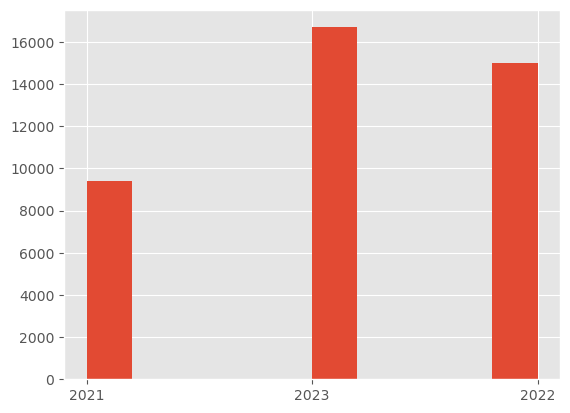

In [55]:
pays['year'].hist()

In [56]:
year = pays['year'].value_counts(dropna=False)
year

2023    16692
2022    15001
2021     9386
Name: year, dtype: int64

In [57]:
week = pays['week'].value_counts(dropna=False)
week.head(5)

38    1516
39    1415
43    1302
26    1299
33    1225
Name: week, dtype: Int64

Больше всего пожертвований - недели
 - 38  
 - 39   
 - 43   
 - 26    
 - 33    

In [58]:
month = pays['month'].value_counts(dropna=False)
month.head(5)

9     4846
8     4736
10    4023
6     3636
4     3593
Name: month, dtype: int64

Больше всего пожертвований - месяца

- 9 - Сентябрь
- 8 - Август
- 10 - Октябрь 
- 6 - Июнь
- 4 - Апрель

In [59]:
hour = pays['hour'].value_counts(dropna=False)
hour.head(6)

00:00    14196
01:00       46
09:24       46
11:25       45
09:20       44
13:09       43
Name: hour, dtype: int64

Больше всего пожертвований в промежутках времени 

- 01:00
- 09:24
- 11:25
- 09:20
- 13:09

In [60]:
pays

,order_datetime,channel_id,channel_name,order_aim,order_sum,order_status,user_id,period,R_value,M_value,F_value,R,F,M,RFM,dt,week,month,hour,year
0,2021-10-14 15:50:00,1,Административный сайт Mindbox,На уставную деятельность,1,Paid,2734,211,756,51,0.009479,1,1,1,111,2021-10-14 15:50:00,41,10,15:50,2021
1,2021-03-18 10:52:00,1,Административный сайт Mindbox,На уставную деятельность,50,Paid,2734,211,967,51,0.009479,1,1,1,111,2021-03-18 10:52:00,11,3,10:52,2021
3,2023-03-29 15:15:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,2847,651,225,500,0.003072,3,1,1,311,2023-03-29 15:15:00,13,3,15:15,2023
4,2021-06-16 23:10:00,1,Административный сайт Mindbox,На уставную деятельность,200,Paid,2847,651,876,500,0.003072,1,1,1,111,2021-06-16 23:10:00,24,6,23:10,2021
5,2021-09-20 14:29:00,1,Административный сайт Mindbox,На уставную деятельность,25,Paid,2861,632,780,120,0.011076,1,1,1,111,2021-09-20 14:29:00,38,9,14:29,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54434,2023-11-09 10:52:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,50,Paid,42464,1,1,50,1.000000,3,3,1,331,2023-11-09 10:52:00,45,11,10:52,2023
54435,2023-11-09 10:52:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,20,Paid,42465,1,1,20,1.000000,3,3,1,331,2023-11-09 10:52:00,45,11,10:52,2023
54441,2023-11-09 11:50:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,500,Paid,42467,1,1,500,1.000000,3,3,1,331,2023-11-09 11:50:00,45,11,11:50,2023
54443,2023-11-09 12:02:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,100,Paid,42468,1,1,100,1.000000,3,3,1,331,2023-11-09 12:02:00,45,11,12:02,2023


In [61]:
data_pivot_1 = pays.pivot_table(index = ['user_id'], columns = 'year',
values = 'order_sum', aggfunc = 'sum')
data_pivot_1.head()

year,2021,2022,2023
user_id,,,
2734,51.0,NaN,NaN
2847,200.0,NaN,300.0
2861,50.0,70.0,NaN
3361,NaN,3000.0,NaN
4982,100.0,NaN,240.0


                                     Выводы по RFM
                                     
 Больше всего пожертвований - месяца

- 9 - Сентябрь
- 8 - Август
- 10 - Октябрь 
- 6 - Июнь
- 4 - Апрель


 Больше всего пожертвований в промежутках времени

 - 01:00
 - 09:24
 - 11:25
 - 09:20
 - 13:09
 
 
 Больше всего пожертвований - недели
 - 38  
 - 39   
 - 43   
 - 26    
 - 33    
 
 
  Топ 10 платежей

 - На уставную деятельность

 - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование (хочу помочь)

 - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»

 - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Егор Цуканов

 - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Софья Пантурова

 - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Максим Широкин

 - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Демид Лебедев

 - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Игнатий Овчинников

 - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Герман и Григорий Алымовы

 - Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Герман Семёнов
 
 Сегменты 
 
 
  - №1 топ сегмент 331 -

3 - был недавно (не более 225 дней с момента визита)

3 - высокая активность (чаще 1 раза в 9 дней)

1 - жадные (до 600 рублей за все время)




  - №2 топ сегмент 231 -

2 - не заходил от 225 до 546 дней,

3 - высокая активность (чаще 1 раза в 9 дней)

1 - жадные (до 600 рублей за все время)



  - №3 топ сегмент 323 -
 
3 - был недавно (не более 225 дней с момента визита)

2 - средняя активность(1 заход в течение 9 - 38 дней),

3 - щедрые (более 2800 рублей)



 - №4 топ сегмент 223 -

2 - не заходил от 225 до 546 дней,

2 - средняя активность(1 заход в течение 9 - 38 дней),

3 - щедрые (более 2800 рублей)



 - №5 топ сегмент 123 -

1 - был давно (больше 546 дней),

2 - средняя активность(1 заход в течение 9 - 38 дней),

3 - щедрые (более 2800 рублей)

Задачи:

– проведение когортного анализа (retention, LTV, средний чек),

– расчет основных маркетинговых и продуктовых метрик,

                                            Когортный анализ 

In [62]:
pays

,order_datetime,channel_id,channel_name,order_aim,order_sum,order_status,user_id,period,R_value,M_value,F_value,R,F,M,RFM,dt,week,month,hour,year
0,2021-10-14 15:50:00,1,Административный сайт Mindbox,На уставную деятельность,1,Paid,2734,211,756,51,0.009479,1,1,1,111,2021-10-14 15:50:00,41,10,15:50,2021
1,2021-03-18 10:52:00,1,Административный сайт Mindbox,На уставную деятельность,50,Paid,2734,211,967,51,0.009479,1,1,1,111,2021-03-18 10:52:00,11,3,10:52,2021
3,2023-03-29 15:15:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,2847,651,225,500,0.003072,3,1,1,311,2023-03-29 15:15:00,13,3,15:15,2023
4,2021-06-16 23:10:00,1,Административный сайт Mindbox,На уставную деятельность,200,Paid,2847,651,876,500,0.003072,1,1,1,111,2021-06-16 23:10:00,24,6,23:10,2021
5,2021-09-20 14:29:00,1,Административный сайт Mindbox,На уставную деятельность,25,Paid,2861,632,780,120,0.011076,1,1,1,111,2021-09-20 14:29:00,38,9,14:29,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54434,2023-11-09 10:52:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,50,Paid,42464,1,1,50,1.000000,3,3,1,331,2023-11-09 10:52:00,45,11,10:52,2023
54435,2023-11-09 10:52:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,20,Paid,42465,1,1,20,1.000000,3,3,1,331,2023-11-09 10:52:00,45,11,10:52,2023
54441,2023-11-09 11:50:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,500,Paid,42467,1,1,500,1.000000,3,3,1,331,2023-11-09 11:50:00,45,11,11:50,2023
54443,2023-11-09 12:02:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,100,Paid,42468,1,1,100,1.000000,3,3,1,331,2023-11-09 12:02:00,45,11,12:02,2023


                                  Профиль пользователя

In [63]:
pays.groupby('channel_name').agg({'order_datetime': 'min'})

,order_datetime
channel_name,
Административный сайт Mindbox,2021-01-01
Сайт,2022-03-29


In [64]:
pays.groupby('channel_name').agg({'order_datetime': 'max'})

,order_datetime
channel_name,
Административный сайт Mindbox,2022-11-30 00:00:00
Сайт,2023-11-09 13:03:00


In [65]:
pays.groupby('order_aim').agg({'order_datetime': 'min', 'channel_name': 'first'})

,order_datetime,channel_name
order_aim,,
На уставную деятельность,2021-01-01 00:00:00,Административный сайт Mindbox
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Айсет Цааева,2023-11-02 15:21:00,Сайт
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Акраман Айдамиров,2023-10-10 06:37:00,Сайт
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Александр Новожилов,2022-11-26 08:09:00,Сайт
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Александр Серяпин,2021-07-21 00:00:00,Административный сайт Mindbox
...,...,...
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Тимур Кондаков,2021-09-06 00:00:00,Административный сайт Mindbox
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Фёдор Мазго,2021-07-18 00:00:00,Административный сайт Mindbox
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Эвелина Квасова,2022-09-17 05:30:00,Сайт


In [66]:
pays.groupby('order_aim').agg({'order_datetime': 'max', 'channel_name': 'first'})

,order_datetime,channel_name
order_aim,,
На уставную деятельность,2022-11-30 00:00:00,Административный сайт Mindbox
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Айсет Цааева,2023-11-09 10:08:00,Сайт
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Акраман Айдамиров,2023-11-08 07:46:00,Сайт
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Александр Новожилов,2023-03-07 16:32:00,Сайт
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Александр Серяпин,2021-09-09 00:00:00,Административный сайт Mindbox
...,...,...
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Тимур Кондаков,2021-11-26 00:00:00,Административный сайт Mindbox
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Фёдор Мазго,2021-08-23 00:00:00,Административный сайт Mindbox
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Эвелина Квасова,2023-01-31 21:55:00,Сайт


Профили пользователей составляют в три этапа:

- Загрузить данные журнала посещений.
- Для каждого пользователя определить дату и время первой сессии.
- Для каждого пользователя определить соответствующие задаче параметры первой сессии. Например, источник перехода на сайт.

In [67]:
def get_profiles(sessions):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        pays.sort_values(by=['user_id', 'order_datetime'])
        .groupby('user_id')
        .agg({'order_datetime': 'first', 'channel_name': 'first'})
        .rename(columns={'order_datetime': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles

In [68]:
profiles = get_profiles(pays)
profiles

,user_id,first_ts,channel_name,dt,month
0,2734,2021-03-18 10:52:00,Административный сайт Mindbox,2021-03-18,2021-03-01
1,2847,2021-06-16 23:10:00,Административный сайт Mindbox,2021-06-16,2021-06-01
2,2861,2021-03-16 12:24:00,Административный сайт Mindbox,2021-03-16,2021-03-01
3,3361,2022-12-20 09:32:00,Сайт,2022-12-20,2022-12-01
4,4982,2021-01-01 20:52:00,Административный сайт Mindbox,2021-01-01,2021-01-01
...,...,...,...,...,...
15377,42464,2023-11-09 10:52:00,Сайт,2023-11-09,2023-11-01
15378,42465,2023-11-09 10:52:00,Сайт,2023-11-09,2023-11-01
15379,42467,2023-11-09 11:50:00,Сайт,2023-11-09,2023-11-01
15380,42468,2023-11-09 12:02:00,Сайт,2023-11-09,2023-11-01


Результат — 15382 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и рекламном источнике, который мотивировал пользователя посетить сайт. Такие данные значительно упрощают дальнейший анализ.
Имея готовые профили пользователей, легко узнать количество привлечённых каждым источником посетителей. Достаточно сгруппировать профили по рекламному каналу и посчитать количество уникальных ID функцией nunique():

In [69]:
profiles.groupby('channel_name').agg({'user_id': 'nunique'})

,user_id
channel_name,
Административный сайт Mindbox,5162
Сайт,10220


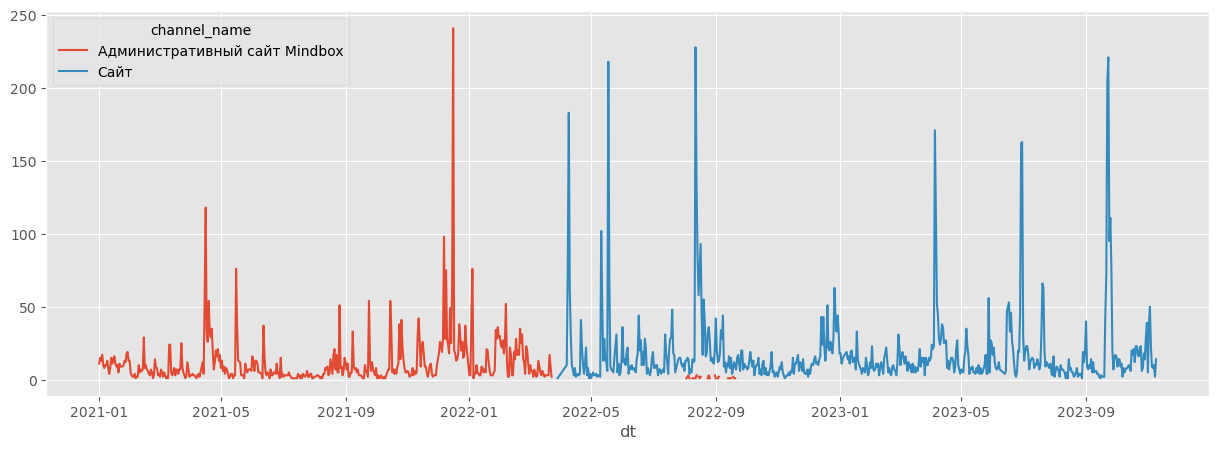

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel_name',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

🔸Коммерческие метрики (можно посчитать по сегментам или когортам)

🔸Маркетинговые метрики (тоже можно по сегментам)

🔸Выводы по работе

Как вариант rolling(7).mean() - скользящее среднее за 7 дней?

Марина по месяцам просила. Но я думаю ей будет интересно и другие варианты посмотреть

действия пользователей

                                          Когортный анализ 2

таблица действий

In [71]:
action

,action_id,user_action,datetime,channel_id,channel_name,user_id
0,175095827,Копия Копия Фандрайзинговая. Даша Семенова 2,2023-10-09 10:24:37,3,Email,2861
1,175102527,Копия Копия Фандрайзинговая. Даша Семенова 2 О...,2023-10-09 10:26:31,3,Email,2861
2,178613400,Счастливая история Марк Садартинов. Разовые От...,2023-10-16 15:00:19,3,Email,2861
3,178615150,Счастливая история Марк Садартинов. Разовые,2023-10-16 15:00:08,3,Email,2861
4,182949420,Копия Фандрайзинговая. Герман Семенов,2023-10-24 10:58:43,3,Email,2861
...,...,...,...,...,...,...
115603,191693755,DOI. Спасибо за разовое пожертвование Отправка,2023-11-07 10:02:23,3,Email,42438
115604,191690843,Клик — 1500р,2023-11-07 09:59:11,9,Сайт,42438
115605,191691072,Подтверждение подписки на новости Отправка,2023-11-07 10:02:12,3,Email,42438
115606,191691199,Просмотр продукта в операции 'Просмотр продукта',2023-11-07 10:00:12,9,Сайт,42438


In [72]:
action.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115608 entries, 0 to 115607
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   action_id     115608 non-null  int64 
 1   user_action   115608 non-null  object
 2   datetime      115608 non-null  object
 3   channel_id    115608 non-null  int64 
 4   channel_name  115608 non-null  object
 5   user_id       115608 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.3+ MB


In [73]:
action['datetime'] = pd.to_datetime(action['datetime'],format='%Y-%m-%d')

In [74]:
action['datetime'].agg(['min','max'])

min   2023-10-04 18:53:07
max   2023-11-07 11:56:57
Name: datetime, dtype: datetime64[ns]

выделю первый день месяца

In [75]:
action['transaction_date'] = action['datetime'].astype('datetime64[M]')

сгруппирую по айди

In [76]:
action.groupby(['transaction_date'])['user_id'].agg(['count','nunique'])

,count,nunique
transaction_date,,
2023-10-01,102868,9316
2023-11-01,12740,1581


                                           таблица платежей 

In [77]:
pays

,order_datetime,channel_id,channel_name,order_aim,order_sum,order_status,user_id,period,R_value,M_value,F_value,R,F,M,RFM,dt,week,month,hour,year
0,2021-10-14 15:50:00,1,Административный сайт Mindbox,На уставную деятельность,1,Paid,2734,211,756,51,0.009479,1,1,1,111,2021-10-14 15:50:00,41,10,15:50,2021
1,2021-03-18 10:52:00,1,Административный сайт Mindbox,На уставную деятельность,50,Paid,2734,211,967,51,0.009479,1,1,1,111,2021-03-18 10:52:00,11,3,10:52,2021
3,2023-03-29 15:15:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,2847,651,225,500,0.003072,3,1,1,311,2023-03-29 15:15:00,13,3,15:15,2023
4,2021-06-16 23:10:00,1,Административный сайт Mindbox,На уставную деятельность,200,Paid,2847,651,876,500,0.003072,1,1,1,111,2021-06-16 23:10:00,24,6,23:10,2021
5,2021-09-20 14:29:00,1,Административный сайт Mindbox,На уставную деятельность,25,Paid,2861,632,780,120,0.011076,1,1,1,111,2021-09-20 14:29:00,38,9,14:29,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54434,2023-11-09 10:52:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,50,Paid,42464,1,1,50,1.000000,3,3,1,331,2023-11-09 10:52:00,45,11,10:52,2023
54435,2023-11-09 10:52:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,20,Paid,42465,1,1,20,1.000000,3,3,1,331,2023-11-09 10:52:00,45,11,10:52,2023
54441,2023-11-09 11:50:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,500,Paid,42467,1,1,500,1.000000,3,3,1,331,2023-11-09 11:50:00,45,11,11:50,2023
54443,2023-11-09 12:02:00,9,Сайт,Пожертвование Благотворительный фонд «АиФ. Доб...,100,Paid,42468,1,1,100,1.000000,3,3,1,331,2023-11-09 12:02:00,45,11,12:02,2023


In [78]:
pays['order_datetime'].agg(['min','max'])

min   2021-01-01 00:00:00
max   2023-11-09 13:03:00
Name: order_datetime, dtype: datetime64[ns]

In [79]:
pays.dtypes

order_datetime    datetime64[ns]
channel_id                 int64
channel_name              object
order_aim                 object
order_sum                  int64
order_status              object
user_id                    int64
period                     int64
R_value                    int64
M_value                    int64
F_value                  float64
R                       category
F                       category
M                       category
RFM                       object
dt                datetime64[ns]
week                      UInt32
month                      int64
hour                      object
year                      object
dtype: object

первый день месяца

In [80]:
pays['transaction_date'] = pays['order_datetime'].astype('datetime64[M]')

C:\Users\Анна\AppData\Local\Temp\ipykernel_9472\2916043113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays['transaction_date'] = pays['order_datetime'].astype('datetime64[M]')


сгруппирую по айди

In [81]:
pays.groupby(['transaction_date'])['user_id'].agg(['count','nunique'])

,count,nunique
transaction_date,,
2021-01-01,425,354
2021-02-01,455,397
2021-03-01,520,466
2021-04-01,937,849
2021-05-01,691,574
2021-06-01,632,563
2021-07-01,505,388
2021-08-01,798,639
2021-09-01,818,647


сколько уникальных user_id в таблице

In [82]:
pays['user_id'].nunique()

15382

сколько месяцев

In [83]:
len(pays.groupby(['transaction_date'])['user_id'].agg(['count','nunique']))

35

In [84]:
15382 * 35

538370

создам отдельную таблицу 

In [85]:
user = pays.groupby('user_id')['transaction_date'].min().reset_index()
user

,user_id,transaction_date
0,2734,2021-03-01
1,2847,2021-06-01
2,2861,2021-03-01
3,3361,2022-12-01
4,4982,2021-01-01
...,...,...
15377,42464,2023-11-01
15378,42465,2023-11-01
15379,42467,2023-11-01
15380,42468,2023-11-01


In [86]:
min_date = pays['transaction_date'].min()
max_date = pays['transaction_date'].max()

сделаю календарь

In [87]:
month = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS'))
month

,0
0,2021-01-01
1,2021-02-01
2,2021-03-01
3,2021-04-01
4,2021-05-01
5,2021-06-01
6,2021-07-01
7,2021-08-01
8,2021-09-01
9,2021-10-01


In [88]:
month.columns = ['month']

In [89]:
user['key'] = 1
month['key'] = 1

In [90]:
template = user.merge(month,on='key')[['user_id','transaction_date','month']]

In [91]:
len(template)

538370

уберу лишние даты

In [92]:
template = template[template['month'] >= template['transaction_date']]
template

,user_id,transaction_date,month
2,2734,2021-03-01,2021-03-01
3,2734,2021-03-01,2021-04-01
4,2734,2021-03-01,2021-05-01
5,2734,2021-03-01,2021-06-01
6,2734,2021-03-01,2021-07-01
...,...,...,...
538229,42464,2023-11-01,2023-11-01
538264,42465,2023-11-01,2023-11-01
538299,42467,2023-11-01,2023-11-01
538334,42468,2023-11-01,2023-11-01


In [93]:
trans_month = pays.groupby(['user_id','transaction_date'])['order_sum'].sum().reset_index()
trans_month

,user_id,transaction_date,order_sum
0,2734,2021-03-01,50
1,2734,2021-10-01,1
2,2847,2021-06-01,200
3,2847,2023-03-01,300
4,2861,2021-03-01,10
...,...,...,...
33509,42464,2023-11-01,50
33510,42465,2023-11-01,20
33511,42467,2023-11-01,500
33512,42468,2023-11-01,100


In [94]:
trans_month.columns = ['user_id','month','revenue']

In [95]:
report = template.merge(trans_month,on=['user_id','month'],how='left')
report

,user_id,transaction_date,month,revenue
0,2734,2021-03-01,2021-03-01,50.0
1,2734,2021-03-01,2021-04-01,NaN
2,2734,2021-03-01,2021-05-01,NaN
3,2734,2021-03-01,2021-06-01,NaN
4,2734,2021-03-01,2021-07-01,NaN
...,...,...,...,...
249630,42464,2023-11-01,2023-11-01,50.0
249631,42465,2023-11-01,2023-11-01,20.0
249632,42467,2023-11-01,2023-11-01,500.0
249633,42468,2023-11-01,2023-11-01,100.0


In [96]:
report['active'] = (report['revenue'] > 0)*1

In [97]:
report

,user_id,transaction_date,month,revenue,active
0,2734,2021-03-01,2021-03-01,50.0,1
1,2734,2021-03-01,2021-04-01,NaN,0
2,2734,2021-03-01,2021-05-01,NaN,0
3,2734,2021-03-01,2021-06-01,NaN,0
4,2734,2021-03-01,2021-07-01,NaN,0
...,...,...,...,...,...
249630,42464,2023-11-01,2023-11-01,50.0,1
249631,42465,2023-11-01,2023-11-01,20.0,1
249632,42467,2023-11-01,2023-11-01,500.0,1
249633,42468,2023-11-01,2023-11-01,100.0,1


почитаю принципы жизни питониста

In [98]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


разложу косынку по когортам

количество пользователей в каждой когорте

In [99]:
report.pivot_table(index='transaction_date',columns='month',values='active',aggfunc='count')

month,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,...,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01
transaction_date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,...,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
2021-02-01,NaN,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,...,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0
2021-03-01,NaN,NaN,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,...,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0
2021-04-01,NaN,NaN,NaN,551.0,551.0,551.0,551.0,551.0,551.0,551.0,...,551.0,551.0,551.0,551.0,551.0,551.0,551.0,551.0,551.0,551.0
2021-05-01,NaN,NaN,NaN,NaN,265.0,265.0,265.0,265.0,265.0,265.0,...,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0
2021-06-01,NaN,NaN,NaN,NaN,NaN,222.0,222.0,222.0,222.0,222.0,...,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0
2021-07-01,NaN,NaN,NaN,NaN,NaN,NaN,66.0,66.0,66.0,66.0,...,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0
2021-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.0,246.0,246.0,...,246.0,246.0,246.0,246.0,246.0,246.0,246.0,246.0,246.0,246.0
2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,249.0,...,249.0,249.0,249.0,249.0,249.0,249.0,249.0,249.0,249.0,249.0


количество активных пользователей в каждой когорте в каждый месяц

In [100]:
report.pivot_table(index='transaction_date',columns='month',values='active',aggfunc='sum')

month,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,...,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01
transaction_date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,354.0,225.0,213.0,198.0,185.0,180.0,163.0,171.0,173.0,161.0,...,22.0,27.0,32.0,29.0,45.0,49.0,55.0,51.0,51.0,17.0
2021-02-01,NaN,172.0,53.0,49.0,42.0,38.0,35.0,47.0,41.0,48.0,...,10.0,18.0,20.0,21.0,23.0,28.0,23.0,20.0,25.0,11.0
2021-03-01,NaN,NaN,200.0,51.0,34.0,39.0,26.0,38.0,36.0,35.0,...,7.0,11.0,6.0,13.0,25.0,19.0,21.0,22.0,24.0,2.0
2021-04-01,NaN,NaN,NaN,551.0,48.0,47.0,36.0,48.0,39.0,30.0,...,13.0,18.0,16.0,28.0,26.0,29.0,33.0,26.0,31.0,7.0
2021-05-01,NaN,NaN,NaN,NaN,265.0,37.0,27.0,38.0,29.0,44.0,...,8.0,11.0,8.0,13.0,14.0,15.0,15.0,16.0,13.0,2.0
2021-06-01,NaN,NaN,NaN,NaN,NaN,222.0,35.0,36.0,28.0,27.0,...,6.0,12.0,8.0,7.0,9.0,15.0,15.0,13.0,16.0,5.0
2021-07-01,NaN,NaN,NaN,NaN,NaN,NaN,66.0,15.0,17.0,17.0,...,1.0,3.0,6.0,3.0,6.0,8.0,5.0,7.0,6.0,3.0
2021-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.0,35.0,33.0,...,11.0,18.0,13.0,25.0,19.0,20.0,18.0,22.0,20.0,3.0
2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,36.0,...,9.0,10.0,6.0,13.0,22.0,18.0,26.0,19.0,21.0,2.0


активность пользователей каждой когорты

In [101]:
report.pivot_table(index='transaction_date',columns='month',values='active',aggfunc='mean')

month,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,...,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01
transaction_date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1.0,0.635593,0.601695,0.559322,0.522599,0.508475,0.460452,0.483051,0.488701,0.454802,...,0.062147,0.076271,0.090395,0.081921,0.127119,0.138418,0.155367,0.144068,0.144068,0.048023
2021-02-01,NaN,1.000000,0.308140,0.284884,0.244186,0.220930,0.203488,0.273256,0.238372,0.279070,...,0.058140,0.104651,0.116279,0.122093,0.133721,0.162791,0.133721,0.116279,0.145349,0.063953
2021-03-01,NaN,NaN,1.000000,0.255000,0.170000,0.195000,0.130000,0.190000,0.180000,0.175000,...,0.035000,0.055000,0.030000,0.065000,0.125000,0.095000,0.105000,0.110000,0.120000,0.010000
2021-04-01,NaN,NaN,NaN,1.000000,0.087114,0.085299,0.065336,0.087114,0.070780,0.054446,...,0.023593,0.032668,0.029038,0.050817,0.047187,0.052632,0.059891,0.047187,0.056261,0.012704
2021-05-01,NaN,NaN,NaN,NaN,1.000000,0.139623,0.101887,0.143396,0.109434,0.166038,...,0.030189,0.041509,0.030189,0.049057,0.052830,0.056604,0.056604,0.060377,0.049057,0.007547
2021-06-01,NaN,NaN,NaN,NaN,NaN,1.000000,0.157658,0.162162,0.126126,0.121622,...,0.027027,0.054054,0.036036,0.031532,0.040541,0.067568,0.067568,0.058559,0.072072,0.022523
2021-07-01,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.227273,0.257576,0.257576,...,0.015152,0.045455,0.090909,0.045455,0.090909,0.121212,0.075758,0.106061,0.090909,0.045455
2021-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.142276,0.134146,...,0.044715,0.073171,0.052846,0.101626,0.077236,0.081301,0.073171,0.089431,0.081301,0.012195
2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.144578,...,0.036145,0.040161,0.024096,0.052209,0.088353,0.072289,0.104418,0.076305,0.084337,0.008032


Посторою тепловую карту 

In [102]:
retention = report.pivot_table(index='transaction_date',columns='month',values='active',aggfunc='mean')

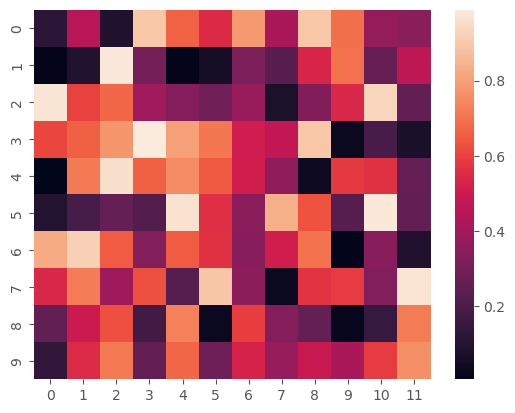

In [103]:
import numpy as np
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

<AxesSubplot:xlabel='month', ylabel='transaction_date'>

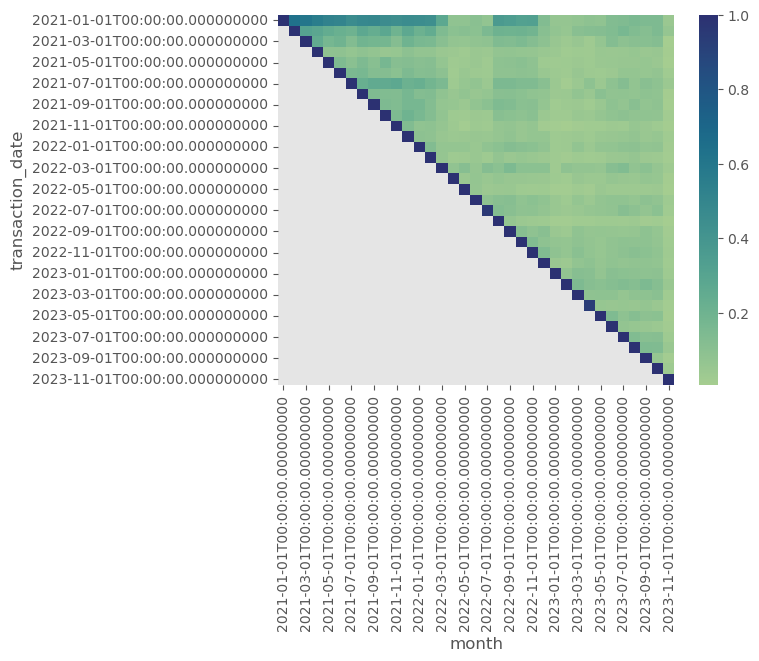

In [104]:
sns.heatmap(retention, cmap="crest")

In [105]:
sns.set(font_scale=2,style="whitegrid",rc={'figure.figsize':(12,6)} )

<AxesSubplot:xlabel='month', ylabel='transaction_date'>

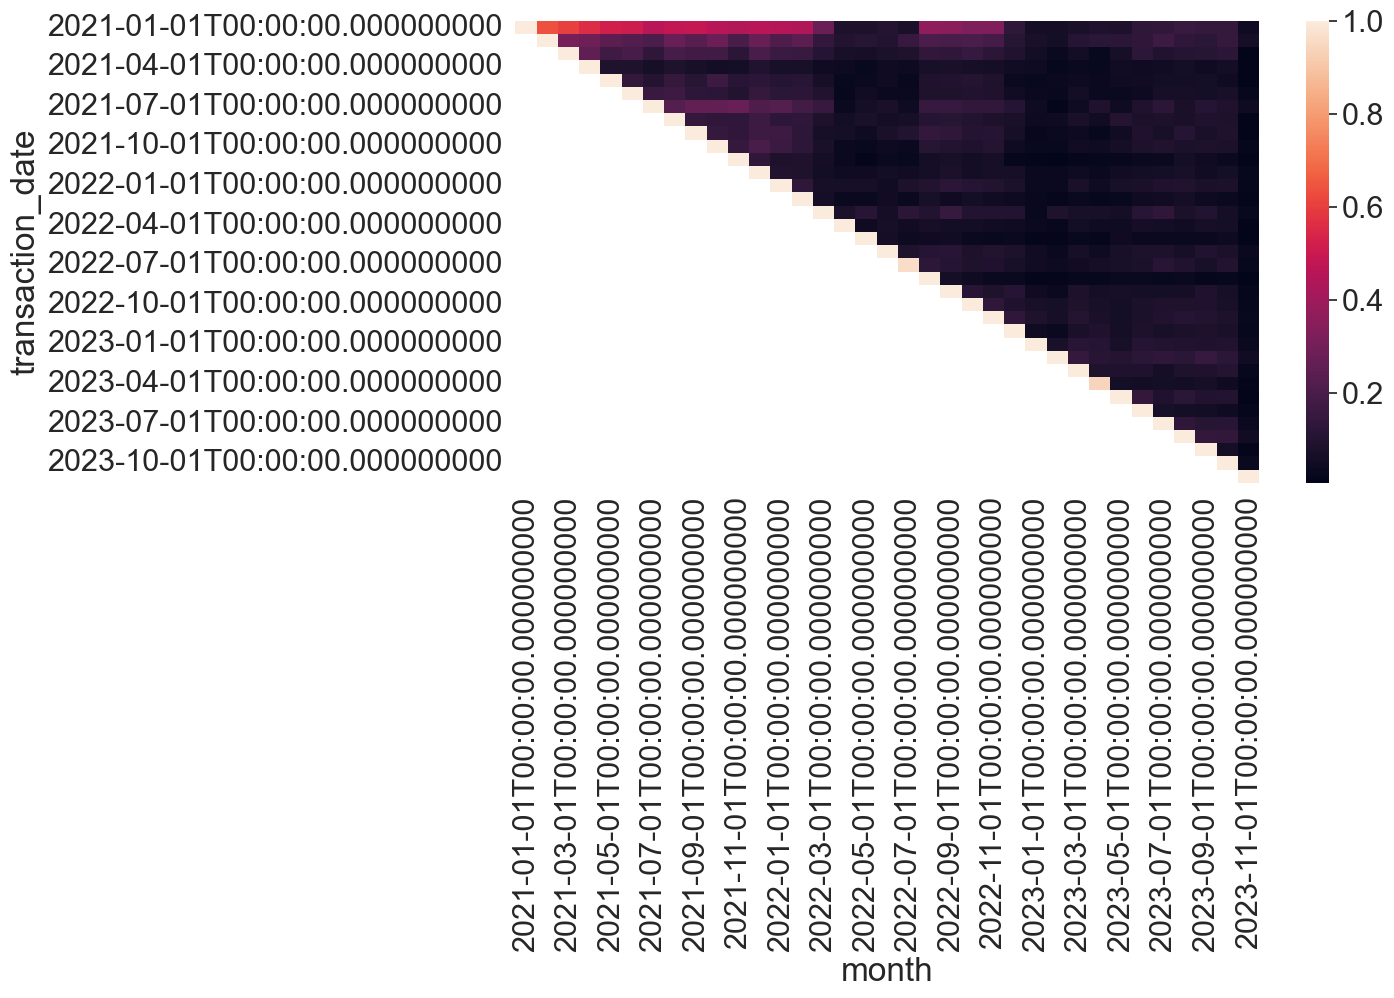

In [106]:
sns.heatmap(retention)

In [107]:
retention

month,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01,2021-08-01,2021-09-01,2021-10-01,...,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01
transaction_date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1.0,0.635593,0.601695,0.559322,0.522599,0.508475,0.460452,0.483051,0.488701,0.454802,...,0.062147,0.076271,0.090395,0.081921,0.127119,0.138418,0.155367,0.144068,0.144068,0.048023
2021-02-01,NaN,1.000000,0.308140,0.284884,0.244186,0.220930,0.203488,0.273256,0.238372,0.279070,...,0.058140,0.104651,0.116279,0.122093,0.133721,0.162791,0.133721,0.116279,0.145349,0.063953
2021-03-01,NaN,NaN,1.000000,0.255000,0.170000,0.195000,0.130000,0.190000,0.180000,0.175000,...,0.035000,0.055000,0.030000,0.065000,0.125000,0.095000,0.105000,0.110000,0.120000,0.010000
2021-04-01,NaN,NaN,NaN,1.000000,0.087114,0.085299,0.065336,0.087114,0.070780,0.054446,...,0.023593,0.032668,0.029038,0.050817,0.047187,0.052632,0.059891,0.047187,0.056261,0.012704
2021-05-01,NaN,NaN,NaN,NaN,1.000000,0.139623,0.101887,0.143396,0.109434,0.166038,...,0.030189,0.041509,0.030189,0.049057,0.052830,0.056604,0.056604,0.060377,0.049057,0.007547
2021-06-01,NaN,NaN,NaN,NaN,NaN,1.000000,0.157658,0.162162,0.126126,0.121622,...,0.027027,0.054054,0.036036,0.031532,0.040541,0.067568,0.067568,0.058559,0.072072,0.022523
2021-07-01,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.227273,0.257576,0.257576,...,0.015152,0.045455,0.090909,0.045455,0.090909,0.121212,0.075758,0.106061,0.090909,0.045455
2021-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.142276,0.134146,...,0.044715,0.073171,0.052846,0.101626,0.077236,0.081301,0.073171,0.089431,0.081301,0.012195
2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.144578,...,0.036145,0.040161,0.024096,0.052209,0.088353,0.072289,0.104418,0.076305,0.084337,0.008032


In [108]:
report

,user_id,transaction_date,month,revenue,active
0,2734,2021-03-01,2021-03-01,50.0,1
1,2734,2021-03-01,2021-04-01,NaN,0
2,2734,2021-03-01,2021-05-01,NaN,0
3,2734,2021-03-01,2021-06-01,NaN,0
4,2734,2021-03-01,2021-07-01,NaN,0
...,...,...,...,...,...
249630,42464,2023-11-01,2023-11-01,50.0,1
249631,42465,2023-11-01,2023-11-01,20.0,1
249632,42467,2023-11-01,2023-11-01,500.0,1
249633,42468,2023-11-01,2023-11-01,100.0,1


посчитаю лайфтайм

In [109]:
report['lifetime'] = ((report['month'] - report['transaction_date'])/np.timedelta64(1, 'M')).round().astype(int)

In [110]:
report

,user_id,transaction_date,month,revenue,active,lifetime
0,2734,2021-03-01,2021-03-01,50.0,1,0
1,2734,2021-03-01,2021-04-01,NaN,0,1
2,2734,2021-03-01,2021-05-01,NaN,0,2
3,2734,2021-03-01,2021-06-01,NaN,0,3
4,2734,2021-03-01,2021-07-01,NaN,0,4
...,...,...,...,...,...,...
249630,42464,2023-11-01,2023-11-01,50.0,1,0
249631,42465,2023-11-01,2023-11-01,20.0,1,0
249632,42467,2023-11-01,2023-11-01,500.0,1,0
249633,42468,2023-11-01,2023-11-01,100.0,1,0


In [122]:
report.groupby(['month'])['user_id'].agg(['count'])

,count
month,
2021-01-01,354
2021-02-01,526
2021-03-01,726
2021-04-01,1277
2021-05-01,1542
2021-06-01,1764
2021-07-01,1830
2021-08-01,2076
2021-09-01,2325


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

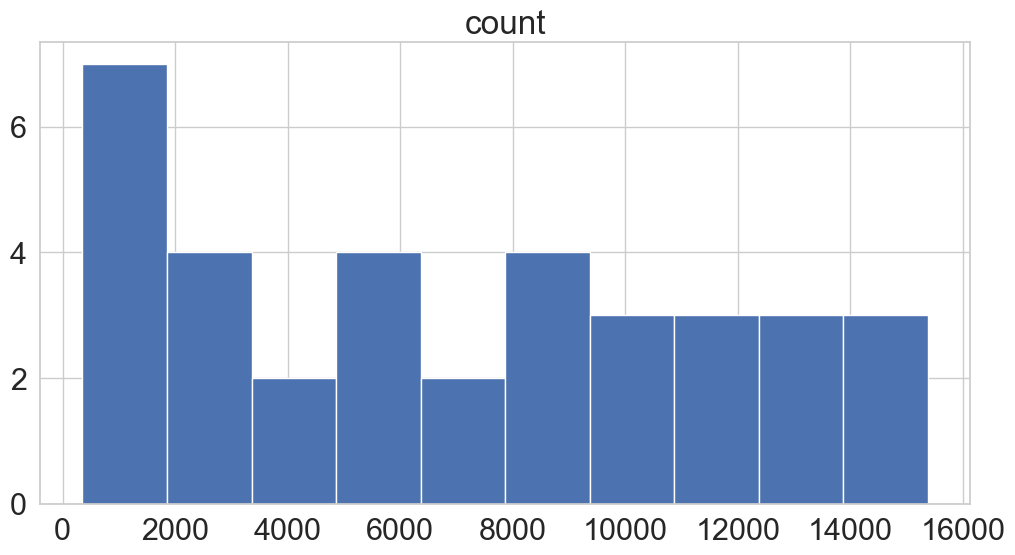

In [121]:
report.groupby(['month'])['user_id'].agg(['count']).hist()

<AxesSubplot:xlabel='user_id', ylabel='month'>

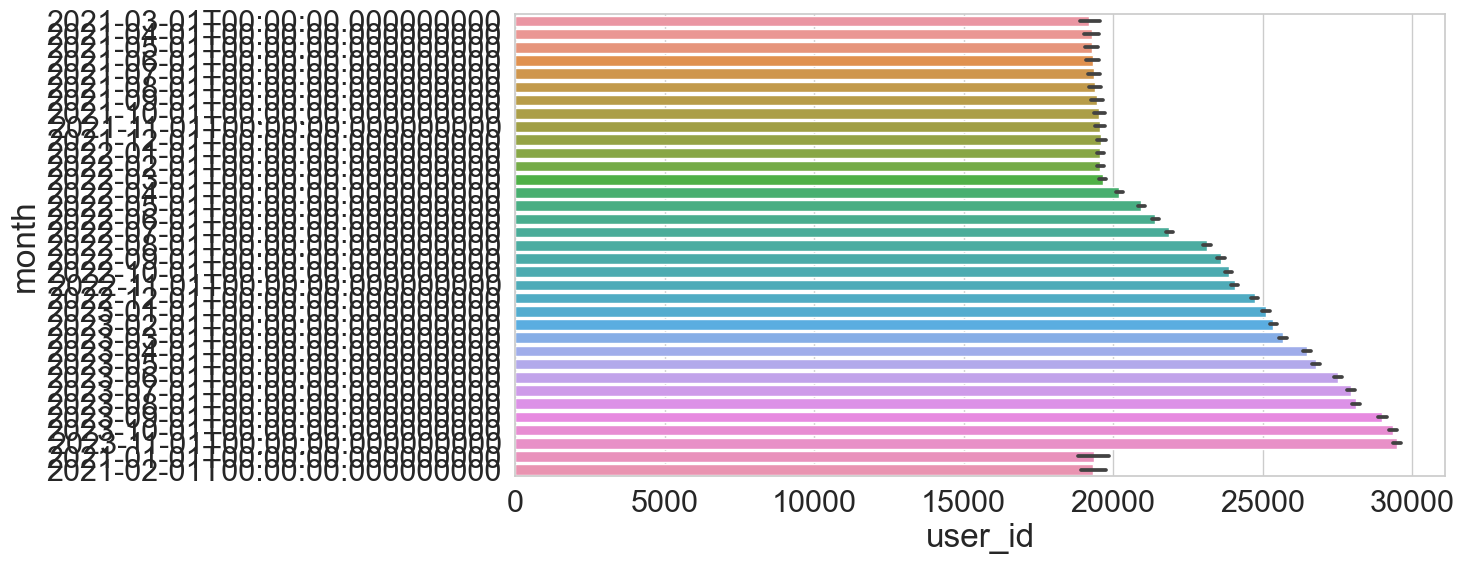

In [127]:
sns.barplot(data=report, x="user_id", y="month")